<a href="https://colab.research.google.com/github/iam-fern/DPDM/blob/master/Final_Exam_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. จากข้อมูล (```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv```) ใน http://qr.tebs.io/TTGDFf สร้าง model เพื่อทำนาย (Classification) ว่าผลการ search เป็นร้านอาหารหรือไม่(```is_food = = True```) โดยพิจารณาจาก 
- วันในสัปดาห์ที่ทำการ search (```Monday-Sunday```) 
- วันในที่ทำการ search (```1-31```)
- เวลาที่ทำการ search (```1-24```)

หมายเหตุที่ 1 สามารถใช้ function ที่ให้มาช่วยในการทำงานได้
1. ```extract_time()``` ซึ่ง input เป็น ```timestamp``` และ output เป็น ```เวลาที่ทำการ search```, ```วันที่ทำการ search```, ```วันในสัปดาห์ที่ทำการ search```

2. ```is_food()``` ซึ่ง input เป็น ```category_name``` และ ```output``` เป็น คำตอบว่า ```เป็นร้านอาหารหรือไม่```

หมายเหตุที่ 2 ควรเตรียมข้อมูลโดยรวมข้อมูลจาก ตาราง ```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv``` ให้ได้ในรูปแบบ ต่อไปนี้
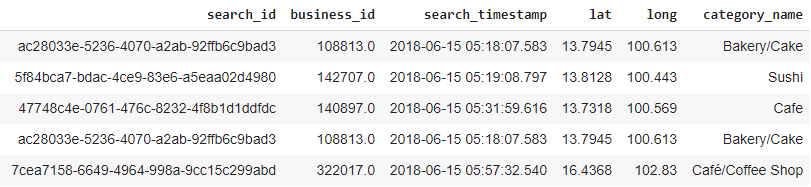

(150 คะแนน)

In [18]:
data1 = pd.read_csv(os.path.join(base_path,'w_restaurant.csv'), encoding = 'unicode_escape') 
data1.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,à¸à¸à¸£à¸´à¸à¸à¸£à¹à¸à¸±à¸à¸à¸à¸£à¸£à¸¡,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,à¸§à¸±à¸à¹à¸¥à¸à¸¢à¸ªà¸¸à¸à¸²à¸£à¸²à¸¡,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,à¸à¸±à¸à¸à¹à¸à¸²à¸£à¸²à¹à¸­à¹à¸à¸°,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,CafÃ©/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [24]:
data1 = []

In [19]:
# dropna จะทำการลบแถวที่มี NaN (มี missing) อยู่ออก
Table_data1 = data1.dropna()

In [20]:
Table_data1.isnull().any().any()

False

In [21]:
print(data1.shape)
print(Table_data1.shape)

(246847, 32)
(4, 32)


In [23]:
new_table1 = Table_data1[['category_name']]
new_table1

,category_name
23976,Noodles
81107,CafÃ©/Coffee Shop
100828,Cafe
220216,Thai


In [25]:
data2 = pd.read_csv(os.path.join(base_path,'search_click.csv'), encoding = 'unicode_escape') 
data2.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [30]:
data2 = []

In [26]:
# dropna จะทำการลบแถวที่มี NaN (มี missing) อยู่ออก
Table_data2 = data2.dropna()

In [27]:
Table_data2.isnull().any().any()

False

In [28]:
print(data2.shape)
print(Table_data2.shape)

(1048575, 6)
(1048206, 6)


In [29]:
new_table2 = Table_data2[['search_id', 'business_id']]
new_table2

,search_id,business_id
0,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0
1,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0
2,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0
3,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0
4,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0
...,...,...
1048570,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0
1048571,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0
1048572,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0
1048573,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0


In [31]:
data3 = pd.read_csv(os.path.join(base_path,'search_request.csv'), encoding = 'unicode_escape') 
data3.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [38]:
data3 = []

In [32]:
# dropna จะทำการลบแถวที่มี NaN (มี missing) อยู่ออก
Table_data3 = data3.dropna()

In [33]:
Table_data3.isnull().any().any()

False

In [34]:
print(data3.shape)
print(Table_data3.shape)

(10004357, 10)
(253276, 10)


In [44]:
new_table3 = Table_data3[['search_id', 'search_timestamp', 'lat', 'long']]
new_table3

,search_id,search_timestamp,lat,long
8,02fedb5c-c9cd-46d7-9354-7613ecb7cfdd,2018-06-22 12:22:17.031,13.7209,100.527
9,e215d487-0450-4794-830a-ecfc0ab6493b,2018-06-22 12:15:24.769,13.7208,100.527
10,3a69e702-e54b-497c-9b8f-c3991d4c02ff,2018-06-22 12:12:24.091,13.7209,100.527
11,03cb2585-738e-4000-afed-e976d123a145,2018-06-22 12:04:43.977,13.7211,100.527
12,4974a821-2bc0-4efe-9e2d-d602669dc283,2018-06-22 12:07:02.556,13.7208,100.527
...,...,...,...,...
9722181,94ec6724-2edf-4e80-a120-af857aa7dbd3,2018-06-19 17:28:48.152,12.9416,100.921
9722420,819915c4-e398-47ff-836b-37e9b814dc7c,2018-06-30 17:23:37.475,13.878,100.413
9723069,83cf5597-8554-4d45-aaa4-213f30cd409a,2018-06-26 18:54:07.796,13.7344,100.527
9723327,a558c025-0279-419e-8e76-dbaee81ea1c5,2018-06-19 15:14:03.872,14.0701,100.595


In [45]:
# รวมตารางครั้งที่ 1
Table_merge1 = new_table2.merge(new_table3, how='left', left_on= 'search_id', right_on= 'search_id')
Table_merge1.head()

,search_id,business_id,search_timestamp,lat,long
0,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,NaN,NaN,NaN
1,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,NaN,NaN,NaN
2,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,NaN,NaN,NaN
3,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,NaN,NaN,NaN
4,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,NaN,NaN,NaN


In [48]:
# รวมตารางครั้งที่ 2 : รวมตาราง Table_merge1 กับ ตาราง data1 เพื่อนำคอลัมน์ category_name มาเพิ่ม
# Table_merge2 = Table_merge1.merge(data1, how='left', left_on= 'category_name', right_on= 'category_name')
# Table_merge2

# หลังจากรวมตารางเสร็จแล้ว ก็ลบแถวที่มี missing ออก
# New_Table_merge1 = Table_merge2.dropna()
# New_Table_merge1.head()

In [49]:
# หลังจากรวมตารางเสร็จแล้ว ก็ลบแถวที่มี missing ออก
New_Table_merge = Table_merge1.dropna()
New_Table_merge.head()

,search_id,business_id,search_timestamp,lat,long
9673,63d48b44-35d1-4661-ad9e-421ba03c369a,294472.0,2018-06-15 05:33:10.253,18.8229,99.0118
9711,5f77dec0-8d50-472a-a33e-c9bb58a137ca,257835.0,2018-06-15 06:40:07.439,13.6849,100.544
9714,5f77dec0-8d50-472a-a33e-c9bb58a137ca,257835.0,2018-06-15 06:40:07.439,13.6849,100.544
9725,0b04944e-30f2-4c10-86a8-d01a6bd026f0,32351.0,2018-06-15 06:42:00.502,13.8096,100.65
9729,6fe78775-3763-4eec-a033-2903f3ff7af8,101291.0,2018-06-15 05:41:30.428,7.00501,100.464


In [50]:
New_Table_merge.shape

(17130, 5)

In [ ]:
# list ของชื่อในคอลัมน์ category_name ค่าไหนเท่ากับ is_food ก็จะเป็น true
# selected_list = New_Table_merge['category_name'] == 'is_food'
# selected_list

In [52]:
# เช่น
selected_list = New_Table_merge['business_id'] == 32351.0
selected_list

9673       False
9711       False
9714       False
9725        True
9729       False
           ...  
1045634    False
1045724    False
1045830    False
1046331    False
1046686    False
Name: business_id, Length: 17130, dtype: bool

In [53]:
New_Table_merge[selected_list].head()

,search_id,business_id,search_timestamp,lat,long
9725,0b04944e-30f2-4c10-86a8-d01a6bd026f0,32351.0,2018-06-15 06:42:00.502,13.8096,100.65
97288,df0e6a2d-b5b1-4ecc-9e8b-61d12d350e2a,32351.0,2018-06-29 11:43:45.159,13.7209,100.53
431079,ef5f84d5-0fd1-413b-9859-9c6fbd35989f,32351.0,2018-06-01 19:20:33.636,12.4127,99.9087
671036,2d984dc6-597f-4cc4-aa5f-4b4817114c87,32351.0,2018-06-02 05:18:09.085,13.9982,100.554
674958,3fc33156-2cce-4940-bba3-94cdf1ed87c6,32351.0,2018-06-01 19:13:40.394,13.762,100.65


In [51]:
import datetime
def extract_time(datetime_s):
    EX_date = datetime.datetime.strptime(datetime_s, "%Y-%m-%d %H:%M:%S.%f")
    return EX_date.hour, EX_date.day, get_day(EX_date.weekday()) 

def get_day(D):
    weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    return weekdays[D] 

def is_food(inp):
    food_list = ['Vegeterian','Sushi','Sukiyaki/Shabu','Street Food/Food Stands','Steak House/Barbeque','Southern Food','Seafood','Ramen','Quick Meal','Pizza','Northern Food','Noodles','Mexican','Korean',
             'Japanese','Italian','Izakaya','Healthy Food','German Food','Fusion Food','French','Food Truck','Fastfood','Dim Sum','Delivery Only','Chinese','Cafe','Café/Coffee Shop','Buffet',
             'Breakfast/Brunch','Bakery/Cake','Barbeque/Grill','American']
    return inp in food_list

2. จากข้อมูล (```reduced_marketbasket.csv```) ใน http://qr.tebs.io/TTGDFf ให้เปรียบเทียบ รูปแบบ การซื้อที่น่าสนใจเป็นราย Transaction ของประชากรใน ประเทศ ```United Kingdom``` กับ ประเทศอื่นๆ (```'Country'!='United Kingdom'```)

(40 คะแนน)

In [3]:
import pandas
import pandas as pd
import os

In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os
base_path = '/content/drive/My Drive/DWDM_material'
os.listdir(base_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['test.csv',
 'metadata.xlsx',
 'search_click.csv',
 'w_restaurant.csv',
 'Copy of search_click.csv',
 '03 สังคม.xls',
 '52835793_259306464964511_3851804852342489088_n.png',
 'Copy of w_restaurant.csv',
 'Preprocessing02.html',
 'teach02.csv',
 'teach.csv',
 'baboon.jpg',
 'data2.csv',
 'data1.gsheet',
 'data3.gsheet',
 'data3.xlsx',
 'data3.csv',
 'data1.xlsx',
 'data1.csv',
 'Local.xlsx',
 'reduced_marketbasket.csv',
 'search_request.csv']

In [117]:
data = pd.read_csv(os.path.join(base_path,'reduced_marketbasket.csv'), encoding = 'unicode_escape') 
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [1]:
data = []

In [80]:
# หา Missing Value
data.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [81]:
data.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [82]:
data.isnull().any().any()

True

In [83]:
# Handling missing values (จัดการกับ missing value)
# dropna จะทำการลบแถวที่มี NaN (มี missing) อยู่ออก
Table_merge = data.dropna()

In [84]:
Table_merge.isnull().any().any()

False

In [85]:
print(data.shape)
print(Table_merge.shape)

(541909, 8)
(406829, 8)


In [98]:
# United Kingdom
New_table = Table_merge[Table_merge['Country']=='United Kingdom']
New_table

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/09/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/09/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/09/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/09/2011 12:49,8.95,13113.0,United Kingdom


In [99]:
New_table.shape

(361878, 8)

In [2]:
New_table = []

In [100]:
New_table_merge = New_table[['Country', 'StockCode', 'Quantity', 'UnitPrice']]
New_table_merge

,Country,StockCode,Quantity,UnitPrice
0,United Kingdom,85123A,6,2.55
1,United Kingdom,71053,6,3.39
2,United Kingdom,84406B,8,2.75
3,United Kingdom,84029G,6,3.39
4,United Kingdom,84029E,6,3.39
...,...,...,...,...
541889,United Kingdom,22466,12,1.95
541890,United Kingdom,22061,8,2.95
541891,United Kingdom,23275,24,1.25
541892,United Kingdom,21217,24,8.95


In [3]:
New_table_merge = []

In [101]:
# 'Country'!='United Kingdom'
New_table1 = Table_merge[Table_merge['Country']!='United Kingdom']
New_table1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/01/2010 08:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/01/2010 08:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/01/2010 08:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/01/2010 08:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/01/2010 08:45,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [102]:
New_table1.shape

(44951, 8)

In [4]:
New_table1 = []

In [105]:
New_table_merge1 = New_table1[['Country', 'StockCode', 'Quantity', 'UnitPrice']]
New_table_merge1

,Country,StockCode,Quantity,UnitPrice
26,France,22728,24,3.75
27,France,22727,24,3.75
28,France,22726,12,3.75
29,France,21724,12,0.85
30,France,21883,24,0.65
...,...,...,...,...
541904,France,22613,12,0.85
541905,France,22899,6,2.10
541906,France,23254,4,4.15
541907,France,23255,4,4.15


In [5]:
New_table_merge1 = []

In [106]:
transacs = data.groupby([New_table_merge['Country']])['UnitPrice'].apply(list)
transacs

Country
United Kingdom    [2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.8...
Name: UnitPrice, dtype: object

In [107]:
transacs1 = data.groupby([New_table_merge1['Country']])['UnitPrice'].apply(list)
transacs1

Country
Australia               [8.5, 4.95, 1.25, 5.45, 6.35, 5.95, 5.95, 8.5,...
Austria                 [0.42, 8.5, 1.45, 0.85, 4.25, 3.75, 2.95, 2.95...
Bahrain                 [1.25, 1.25, 1.25, 9.95, 4.95, 12.75, 1.65, 2....
Belgium                 [2.1, 9.95, 0.42, 0.42, 0.42, 0.55, 0.55, 1.65...
Brazil                  [10.95, 2.55, 2.55, 2.55, 6.75, 3.39, 1.95, 1....
Canada                  [1.95, 1.65, 4.25, 1.69, 0.65, 2.1, 0.85, 1.69...
Channel Islands         [7.95, 7.95, 7.95, 7.95, 1.69, 4.95, 4.95, 2.5...
Cyprus                  [2.55, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 2.9...
Czech Republic          [2.55, 0.65, 0.85, 1.25, 1.45, 0.85, 1.49, 1.2...
Denmark                 [14.95, 3.75, 1.65, 7.95, 1.25, 1.25, 2.1, 3.7...
EIRE                    [9.95, 2.95, 2.55, 0.85, 2.25, 2.25, 1.45, 1.9...
European Community      [14.95, 7.95, 7.95, 2.95, 2.95, 2.95, 6.75, 6....
Finland                 [0.55, 0.55, 0.55, 0.42, 0.55, 0.42, 0.29, 0.2...
France                  [3.75,

In [112]:
!pip install apyori

In [113]:
from apyori import apriori

In [ ]:
out = list(apriori(transacs, min_support = 0.07, min_confidence = 0.7))
out

เนื่องจากคนที่จะซื้อสินค้า {'...', '...'} มีความน่าจะเป็นคือ ...
และถ้า lift > 1 ทุกคู่ ดังนั้นจะมีโปรโมชั่นให้ ถ้าลูกค้าซื้อสินค้าคู่ดังกล่าวสะสมครบ 10 ครั้ง ทางร้านจะแถมสินค้า 1 คู่ให้ โดยลูกค้าสามารถเลือกคู่ใดคู่หนึ่งได้ฟรี

In [114]:
out1 = list(apriori(transacs1, min_support = 0.01, min_confidence = 0.7))
out1

KeyboardInterrupt: ignored

เนื่องจากคนที่จะซื้อสินค้า {'...', '...'} มีความน่าจะเป็นคือ ...
และถ้า lift > 1 ทุกคู่ ดังนั้นจะมีโปรโมชั่นให้ ถ้าลูกค้าซื้อสินค้าคู่ดังกล่าวสะสมครบ 10 ครั้ง ทางร้านจะแถมสินค้า 1 คู่ให้ โดยลูกค้าสามารถเลือกคู่ใดคู่หนึ่งได้ฟรี

3. เขียนคำศัพท์ที่ได้เรียนในวิชาพร้อมทั้งคำนิยามที่เป็นคำพูดของนักศึกษาเอง (ห้าม search google) 20 คำ

(คำละ 0.5 คะแนน)

#### 1) Data Mining คือ การทำเหมืองข้อมูล สกัดเอาความรู้ที่ซ่อนอยู่ในข้อมูลออกมา
#### 2) Mining คือการทำเหมืองแร่
#### 3) data base คือเก็บข้อมูลไม่ให้มัน้ำซ้อน ไม่ให้ข้อมูลหายไป
#### 4) search กับ query คือการหาการสอบถามเหมือนกัน ไม่ถือว่าเป็น data mining
#### 5) data intergration เอาข้อมูลจากหลายๆแหล่งมารวมกัน สามารถเอาข้อมูลมารวมกันได้ เช่น ดูจากเลขบัตรประชาชนของแต่ละบุคคล จัดให้ข้อมูลเป็นรูปแบบเดียวกัน
#### 6) data warehouse คือเก็บข้อมูลเอาไว้ตอบโจทย์ทางธุรกิจ ผู้บริหารสามารถเข้ามาดูได้ จะโชว์ข้อมูลในมุมต่างๆ
#### 7) Classficaation : ทำนายโดยที่เรารู้ผลอยู่แล้ว คือเรารู้ว่าอยู่กลุ่มไหน จะแยกอย่างไรว่าอันไหนอยู่กลุ่มไหน
#### 8) Clustering : จัดกลุ่มที่มีลักษณะเหมือนกันให้อยู่ร่วมกัน เหมือนกันอยู่ด้วยกัน คือมีความสัมพันธ์กัน
#### 9) data streams : ข้อมูลที่เป็นกระแสที่ไหลไปเรื่อยๆ
#### 10) Spatial data : ข้อมูลเชิงพื้นที่ เช่น แผนที่มีแกน X กับแกน Y และรูปภาพ
#### 11) Text database : ข้อมูลที่เป็นข้อความ เช่น ค้นหาข้อมูลใน wiki แล้วข้อมูลถูกอธิบายด้วยข้อความยาวๆ
#### 12) Outlier หาข้อมูลที่หายไป ผิดปกติ เช่น การกรอกข้อมูลผิดพลาด
#### 13) Sparsity : จุดไหนที่ไม่มีข้อมูลก็จะเป็นช่องว่าง
#### 14) Resolution : สเกลมีการแปลผลของข้อมูล สเกล (scale) มีความสำคัญ
#### 15) Distribution : สามารถอธิบายข้อมูลด้วยค่ากลาง
#### 16) Transaction data เป็นการเก็บข้อมูลที่ไม่มีหัวข้อ แค่เรียงๆ ขั้นด้วย comma
#### 17) Data matrix เป็นการเก็บข้อมูลที่ตารางมีหัวข้อสองฝั่ง
#### 18) Relational records เป็นการใช้ Index หรือ ID ใช้เชื่อมข้อมูลของตารางนึงไปยังตารางนึง เช่น เลขบัตรประชาชน
#### 19) Document data เป็นการเก็บข้อมูลที่มี attributes ด้านบน และ ตัวบอกตัวตนด้านข้าง เหมือน ตารางทั่วไป
#### 20) Boxplot ใช้แสดงสาระที่สำคัญของข้อมูลคือ ค่ากลาง ค่าการกระจาย สัดส่วนข้อมูลที่มากหรือน้อยกว่าค่ากลาง ( Symmetry ) รวมทั้งข้อมูลที่อยู่ห่างจากกลุ่มมากๆ (Outlier) จะแสดงข้อมูลทั้งหมดออกมา 3 Quartiles โดยมีการจัดเรียงอันดับของข้อมูลแล้ว ข้อมูลที่ตกอยู่ภายใต้ Q1 (Quartile 1) คือข้อมูล 25% แรกจากค่าต่ำขึ้นมา